In [60]:
import pandas as pd
import numpy as np

# Preprocessing: Load the data from CSV
data = pd.read_csv('/home/nandini/Downloads/03_Persons_arrested_and_their_disposal_by_police_and_court_under_crime_against_children_2013.csv')

# Drop the column "Persons against whom cases were compounded or withdrawn"
data.drop(columns=["Persons against whom cases were compounded or withdrawn"], inplace=True)

# Data Transformation: Pivot the DataFrame
pivot_data = data.pivot_table(index=['STATE/UT', 'CRIME HEAD'], aggfunc=np.sum)

# Save the processed data to CSV
pivot_data.to_csv("processed_data.csv")

# Display the processed data
print(pivot_data)


                                                     Persons acquitted  \
STATE/UT    CRIME HEAD                                                   
A&N Islands Abetment of Suicide                                      0   
            Buying of Girls for Prostitution                         0   
            Exposure and Abandonment                                 0   
            Foeticide                                                0   
            Infanticide                                              0   
...                                                                ...   
West Bengal Procuration of Minor Girls                              34   
            Prohibition of Child Marriage Act, 2006                  0   
            Rape of Children                                        78   
            Selling of Girls for Prostitution                       12   
            Total Crimes against Children                          385   

                                     

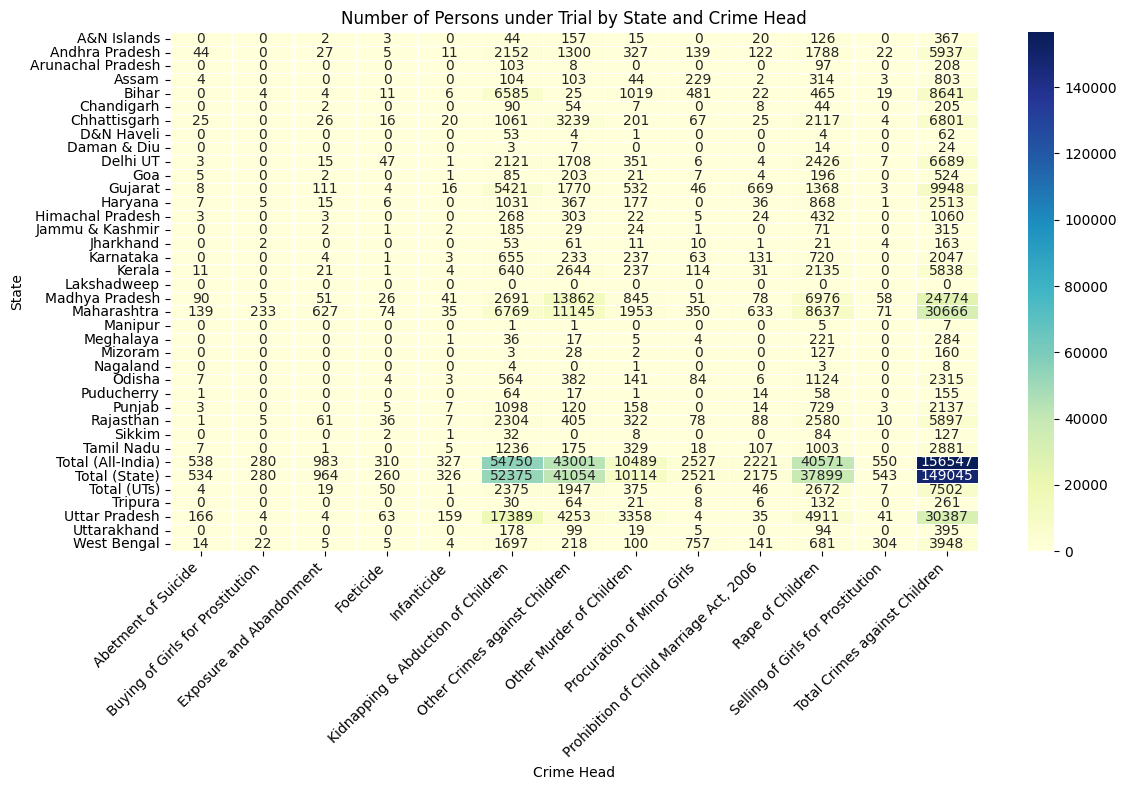

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Pivot the data for visualization
heatmap_data = processed_data.pivot(index='STATE/UT', columns='CRIME HEAD', values='Total number of persons under trial during the year')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Number of Persons under Trial by State and Crime Head')
plt.xlabel('Crime Head')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

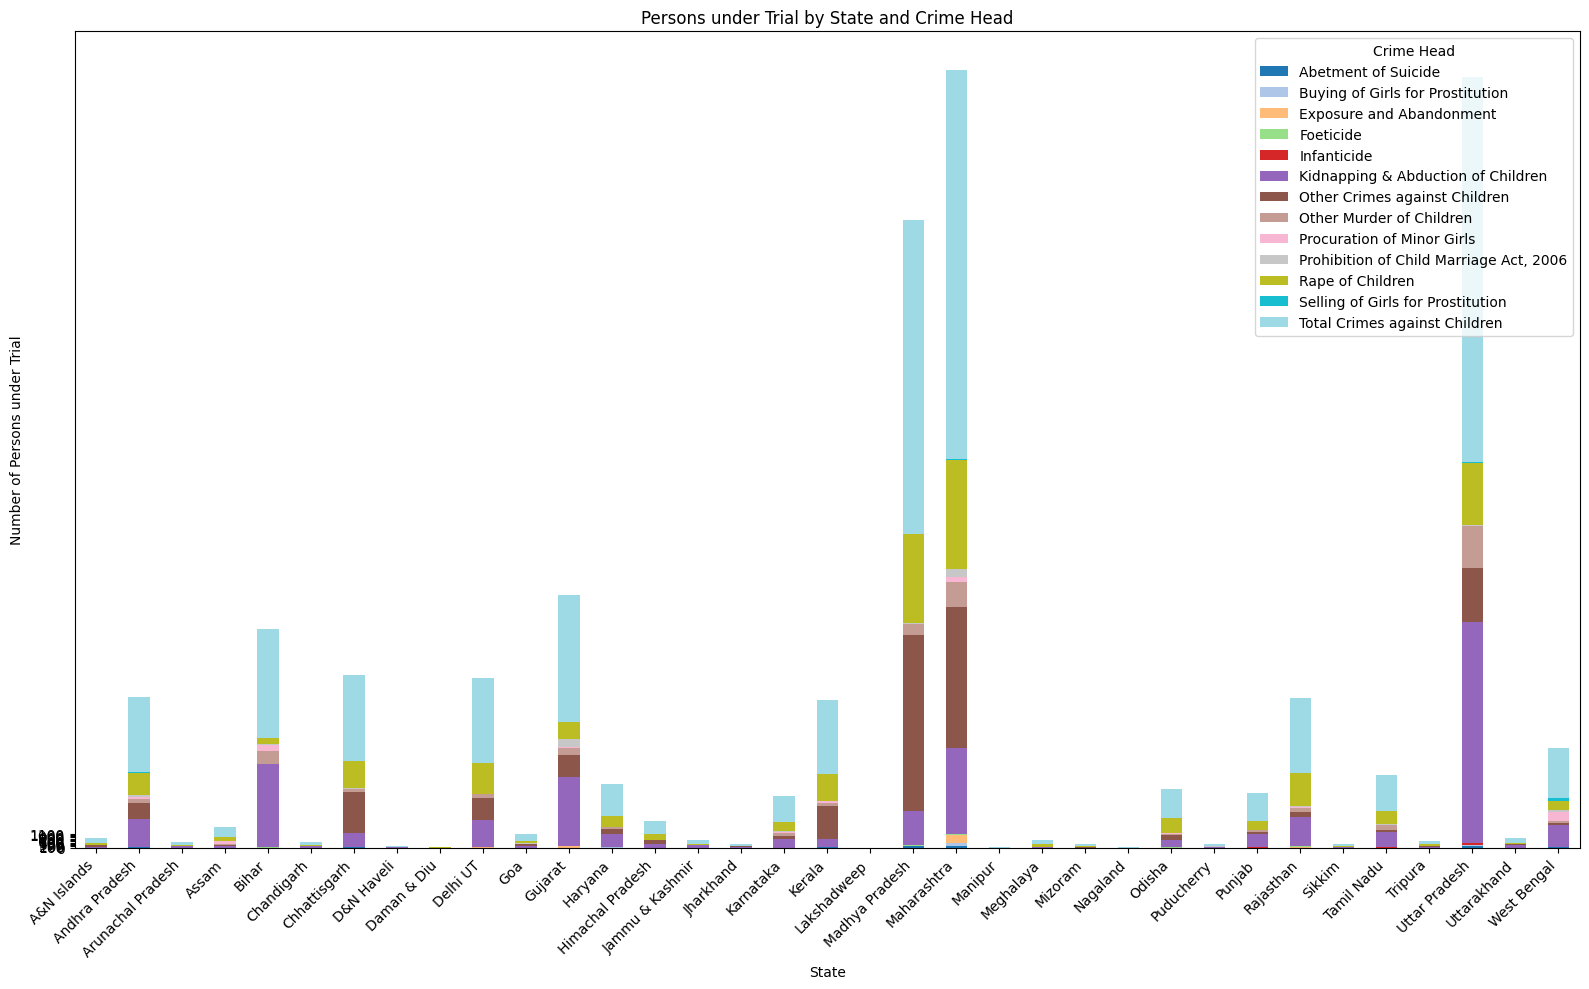

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Filter out rows with labels 'TotalState', 'TotalUT', and 'Total'
filtered_data = processed_data[~processed_data['STATE/UT'].str.startswith('Total')]

# Pivot the filtered data for visualization
pivot_data = filtered_data.pivot_table(index='STATE/UT', columns='CRIME HEAD', values='Total number of persons under trial during the year', fill_value=0)

# Plotting the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20')
ax.set_title('Persons under Trial by State and Crime Head')
ax.set_xlabel('State')
ax.set_ylabel('Number of Persons under Trial')
ax.legend(title='Crime Head', loc='upper right')  # Set legend location to upper right
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 1101, 100))  # Set y-axis ticks at intervals of 100
plt.tight_layout()
plt.show()


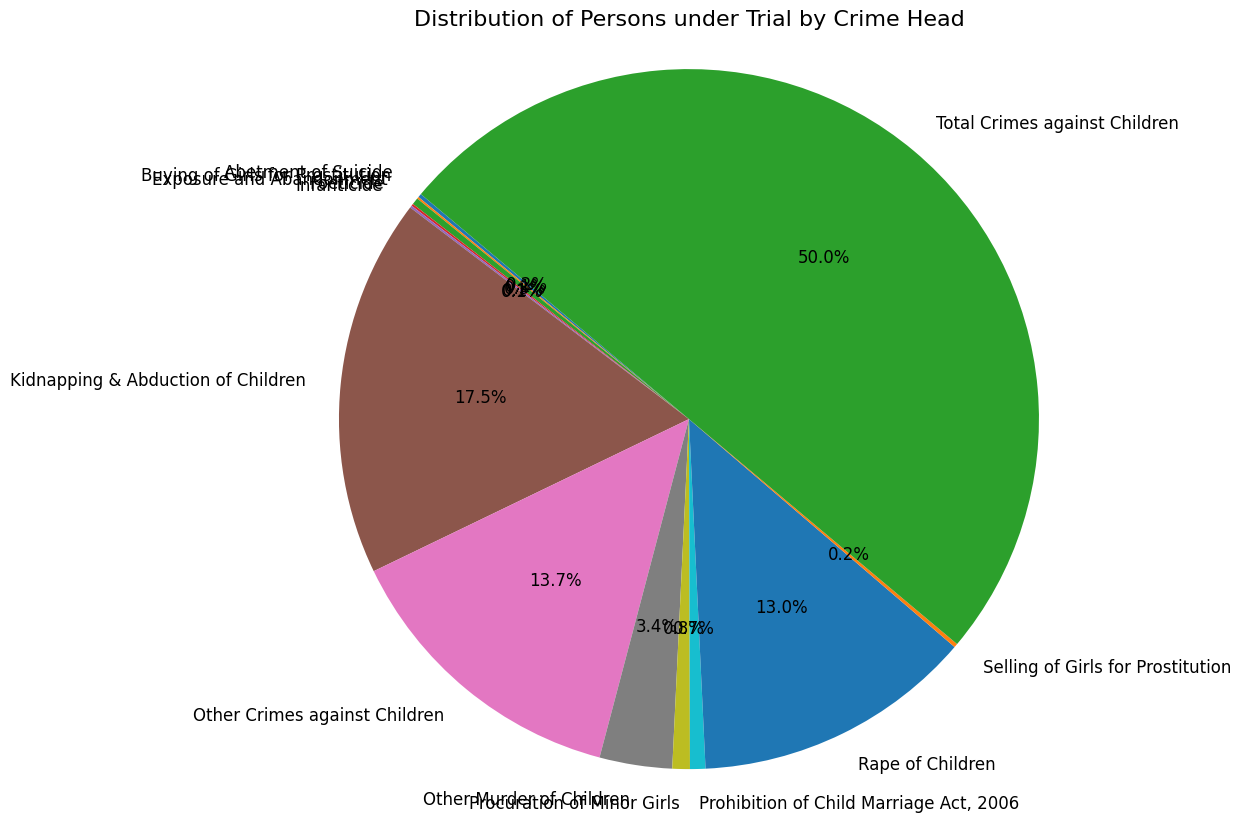

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Aggregate data by crime head
crime_head_counts = processed_data.groupby('CRIME HEAD')['Total number of persons under trial during the year'].sum()

# Plotting the pie chart
plt.figure(figsize=(12, 10))
plt.pie(crime_head_counts, labels=crime_head_counts.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1, textprops={'fontsize': 12})
plt.title('Distribution of Persons under Trial by Crime Head', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

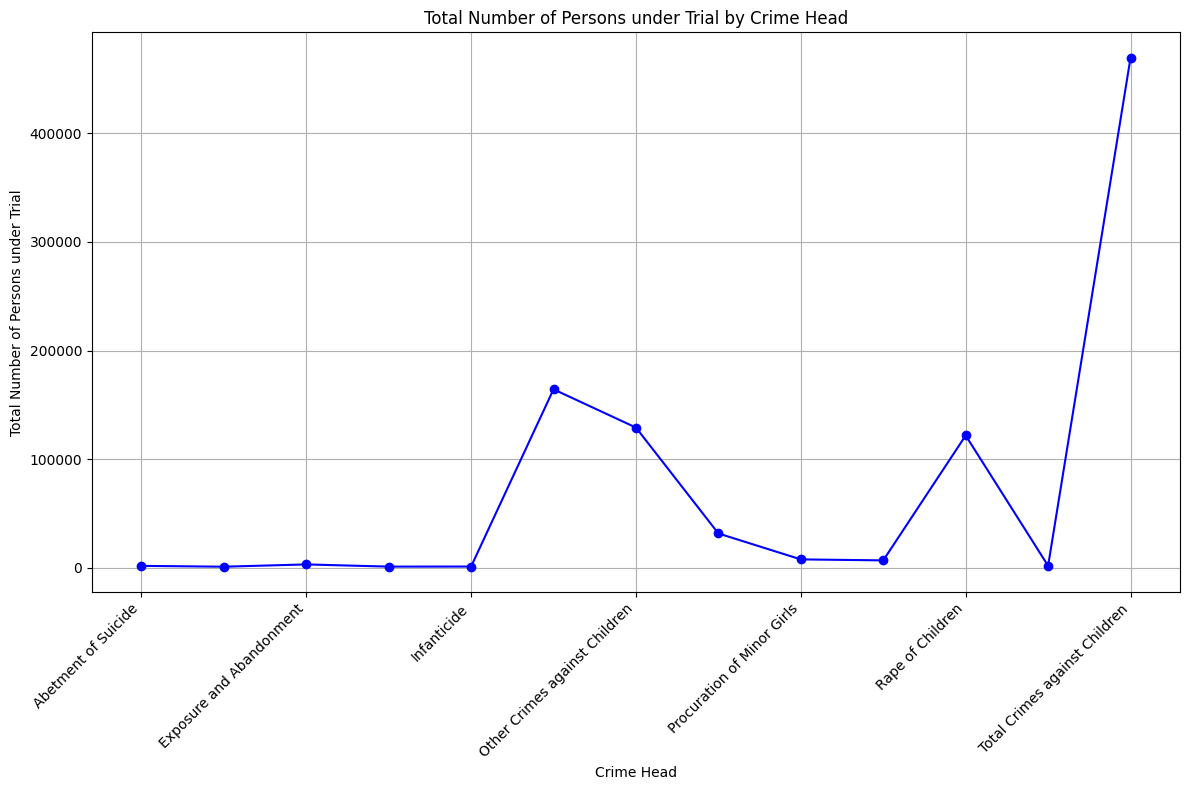

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Aggregate the data by crime head
crime_head_totals = processed_data.groupby('CRIME HEAD')['Total number of persons under trial during the year'].sum()

# Plotting the line chart
plt.figure(figsize=(12, 8))
crime_head_totals.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Total Number of Persons under Trial by Crime Head')
plt.xlabel('Crime Head')
plt.ylabel('Total Number of Persons under Trial')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

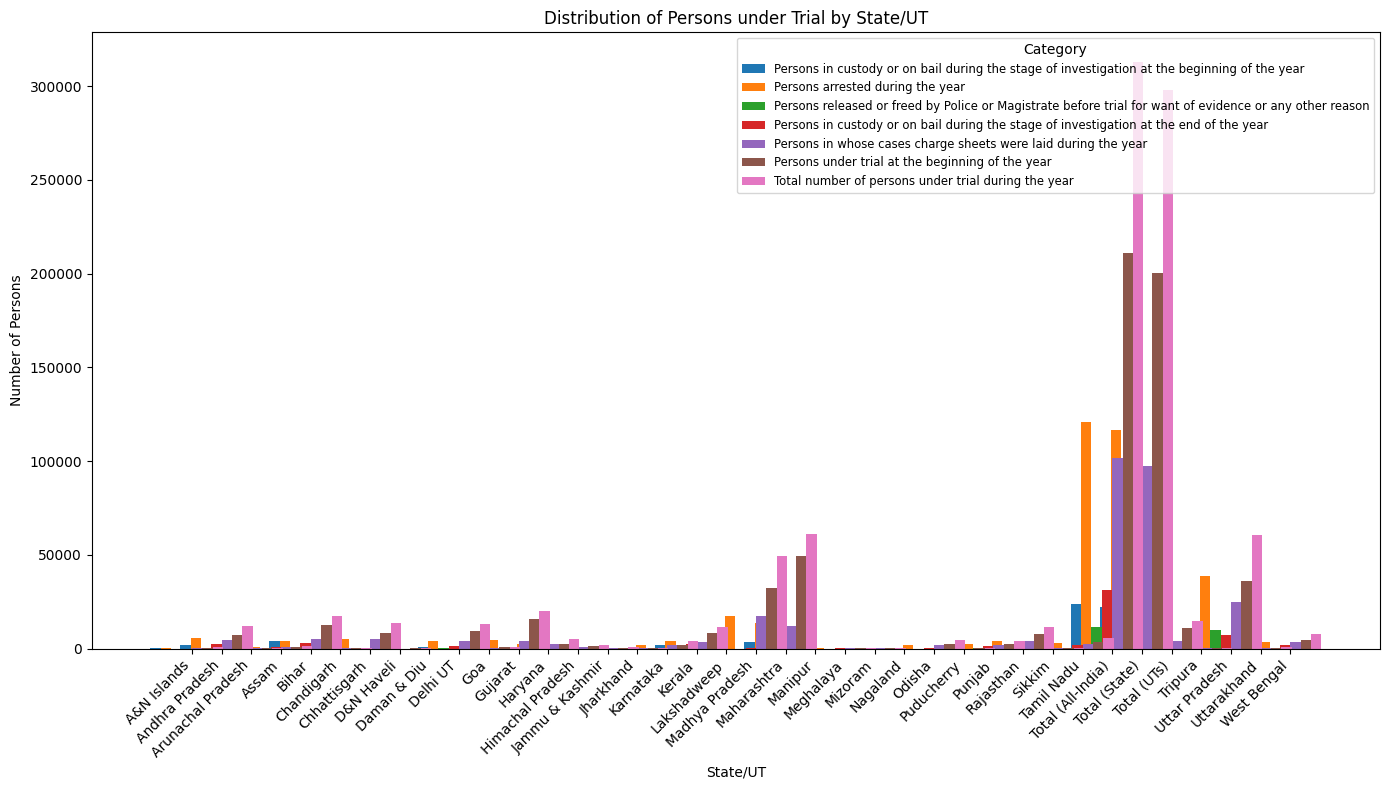

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Group the data by STATE/UT and sum the values
state_totals = processed_data.groupby('STATE/UT').sum()

# Select the columns for visualization
columns_to_plot = ['Persons in custody or on bail during the stage of investigation at the beginning of the year',
                   'Persons arrested during the year',
                   'Persons released or freed by Police or Magistrate before trial for want of evidence or any other reason',
                   'Persons in custody or on bail during the stage of investigation at the end of the year',
                   'Persons in whose cases charge sheets were laid during the year',
                   'Persons under trial at the beginning of the year',
                   'Total number of persons under trial during the year']

# Get the number of categories and states
num_categories = len(columns_to_plot)
num_states = len(state_totals)

# Set the width of each bar
bar_width = 0.35

# Define the index for each bar group
index = np.arange(num_states)

# Plotting the grouped bar chart
plt.figure(figsize=(14, 8))
for i, column in enumerate(columns_to_plot):
    plt.bar(index + (i * bar_width), state_totals[column], bar_width, label=column)

plt.title('Distribution of Persons under Trial by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Persons')
plt.xticks(index + (num_categories * bar_width) / 2, state_totals.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()


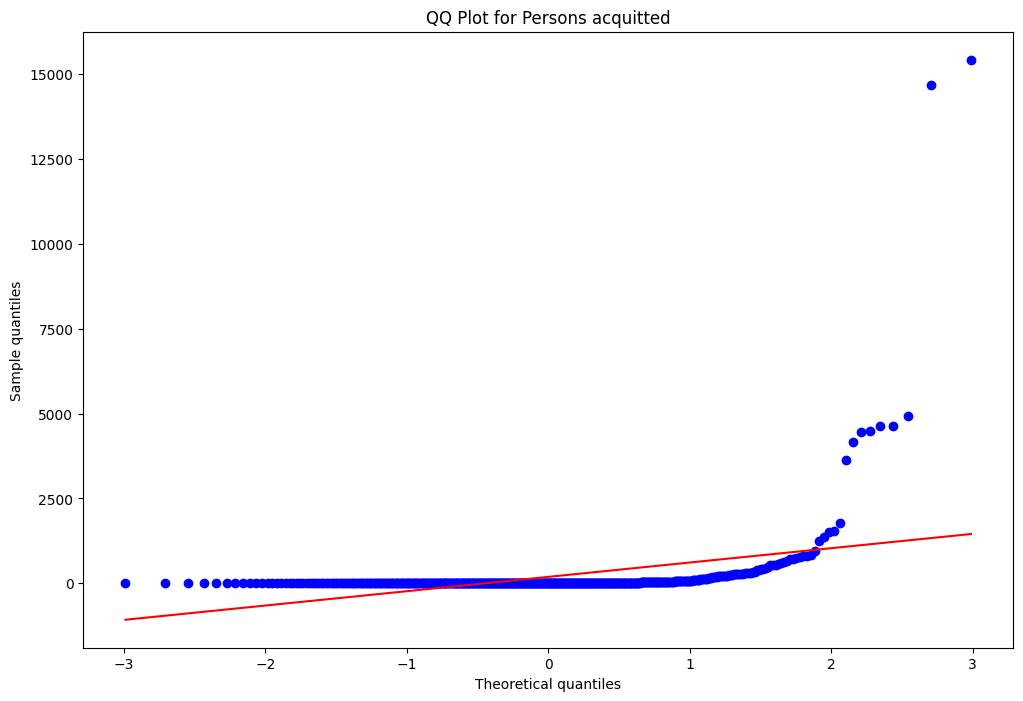

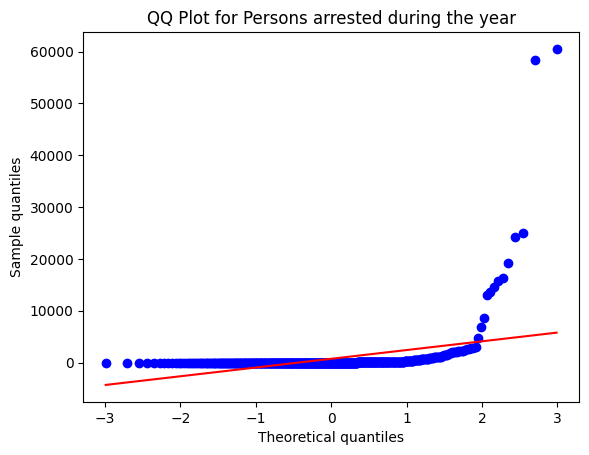

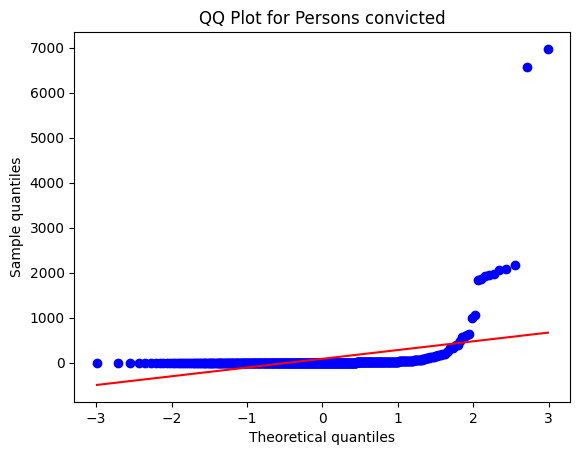

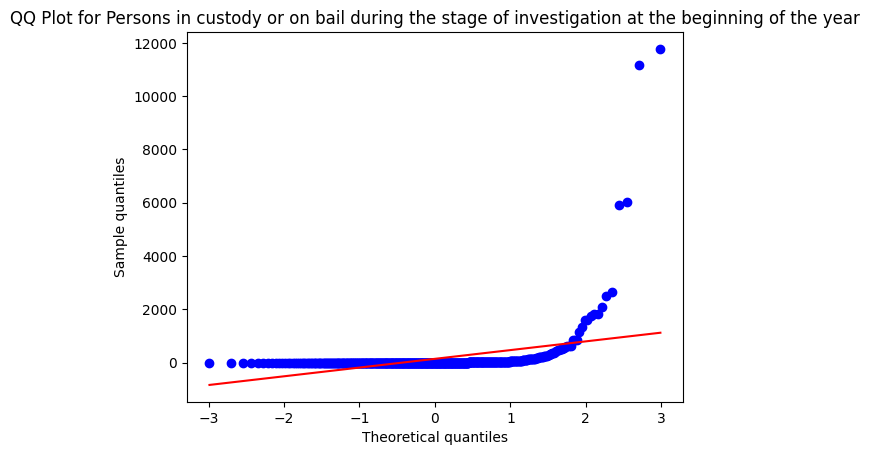

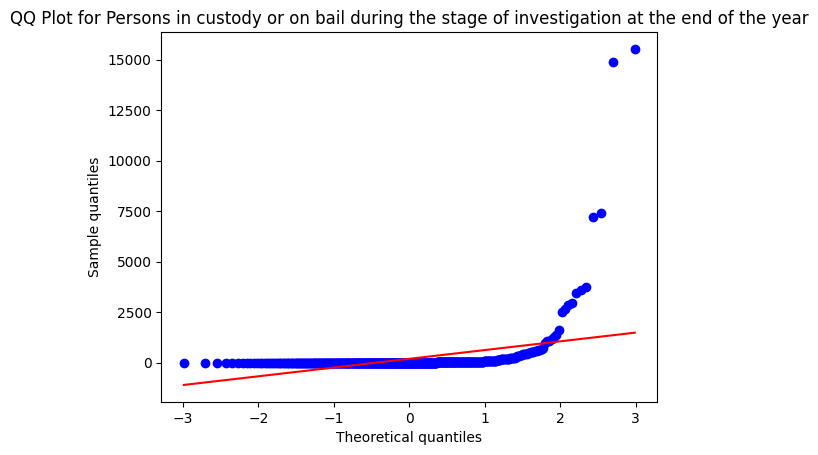

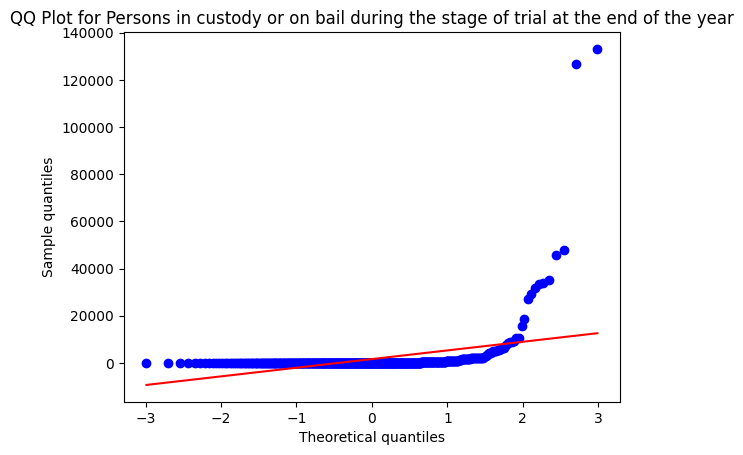

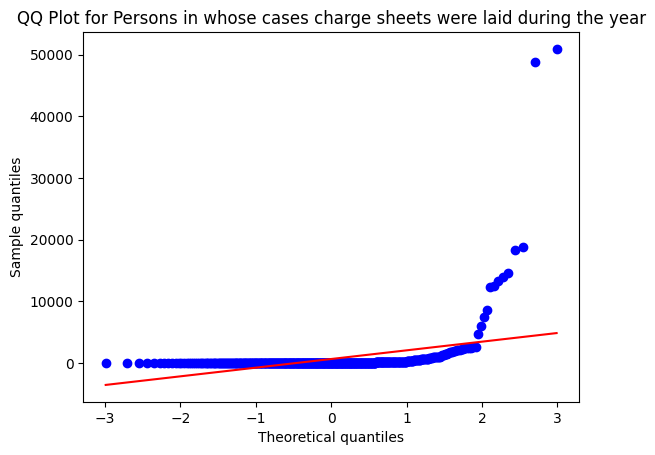

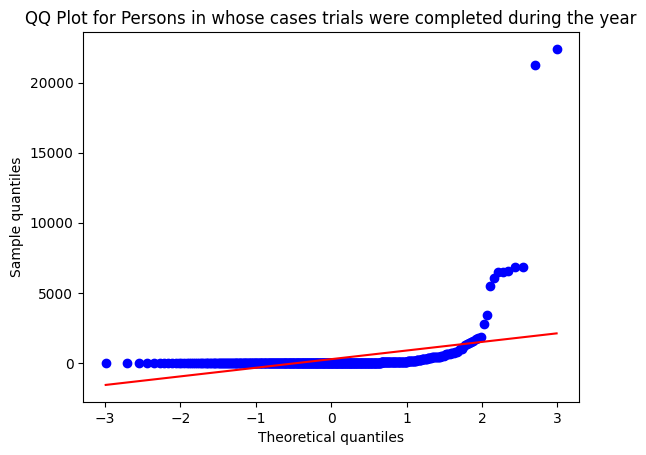

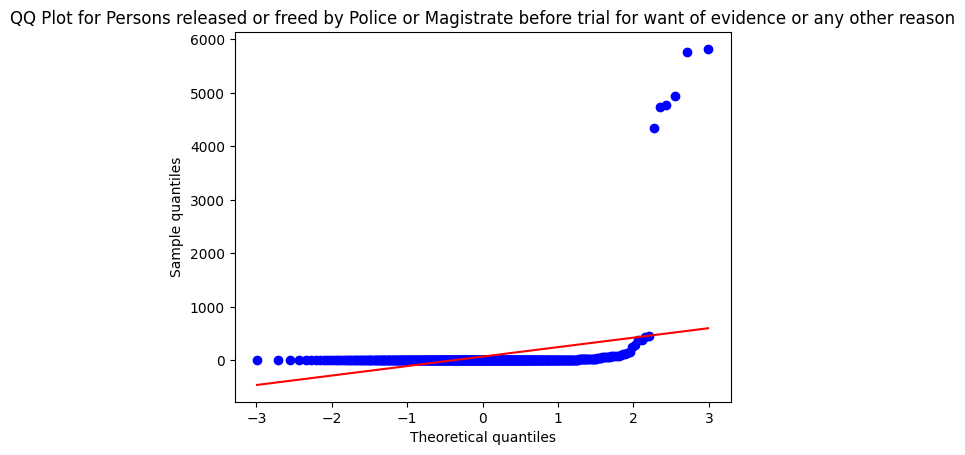

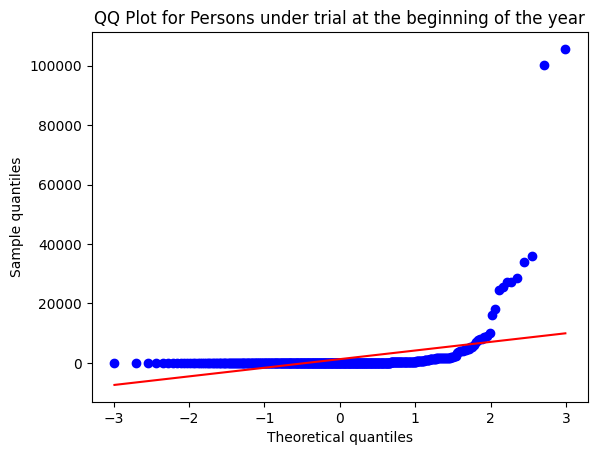

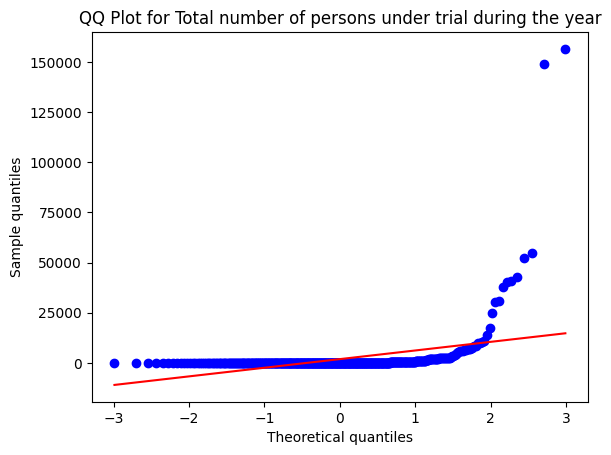

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Select numerical columns for QQ plot
numerical_columns = processed_data.select_dtypes(include=[np.number]).columns

# Plotting QQ plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    stats.probplot(processed_data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.show()


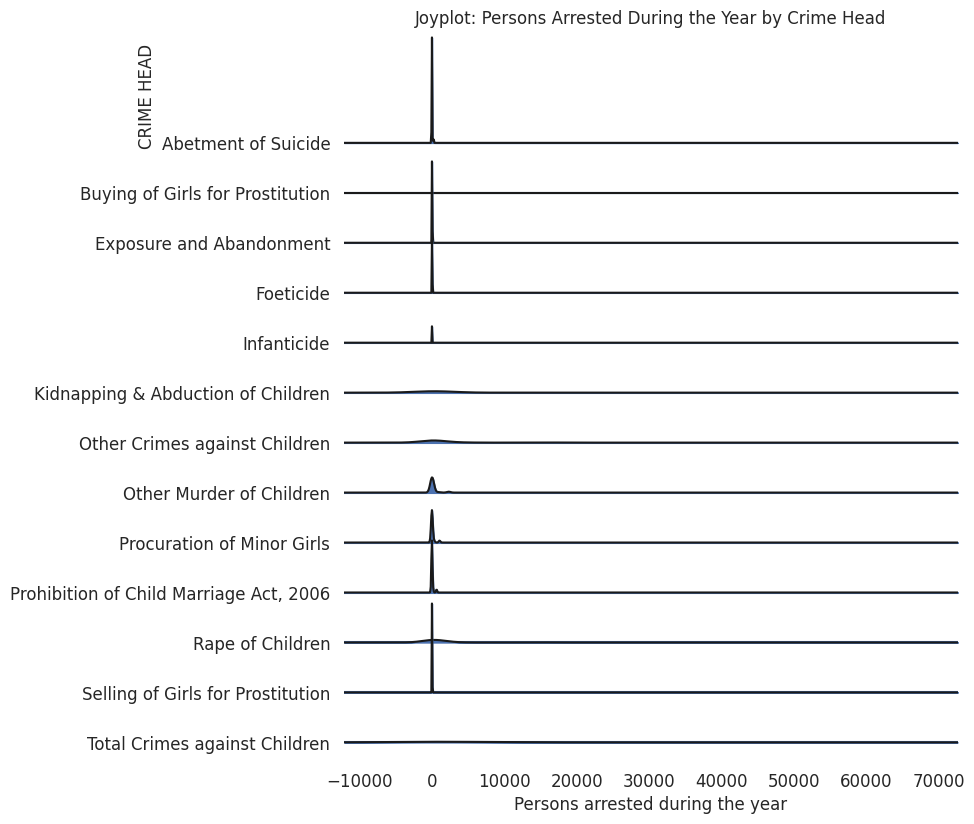

In [74]:
import pandas as pd
import joypy

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Selecting the column for the joyplot
column_to_plot = 'Persons arrested during the year'

# Plotting the joyplot
fig, axes = joypy.joyplot(processed_data, column=column_to_plot, by='CRIME HEAD', figsize=(10, 8))

# Customize labels and title
axes[-1].set_xlabel(column_to_plot)
axes[0].set_ylabel('CRIME HEAD')
plt.title('Joyplot: Persons Arrested During the Year by Crime Head')

# Show the plot
plt.show()


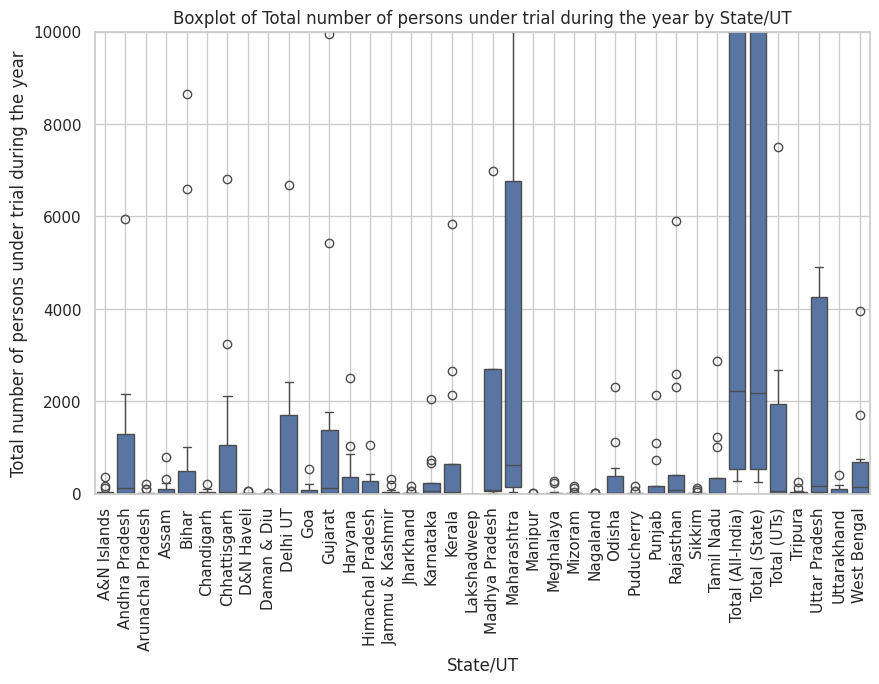

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('processed_data.csv')

# Select the column for analysis
column_to_analyze = 'Total number of persons under trial during the year'

# Set the range for the y-axis
y_range = (0, 10000)  # Adjust the range as needed

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATE/UT', y=column_to_analyze, data=data)
plt.title('Boxplot of Total number of persons under trial during the year by State/UT')
plt.xlabel('State/UT')
plt.ylabel(column_to_analyze)
plt.ylim(y_range)  # Set the y-axis range
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

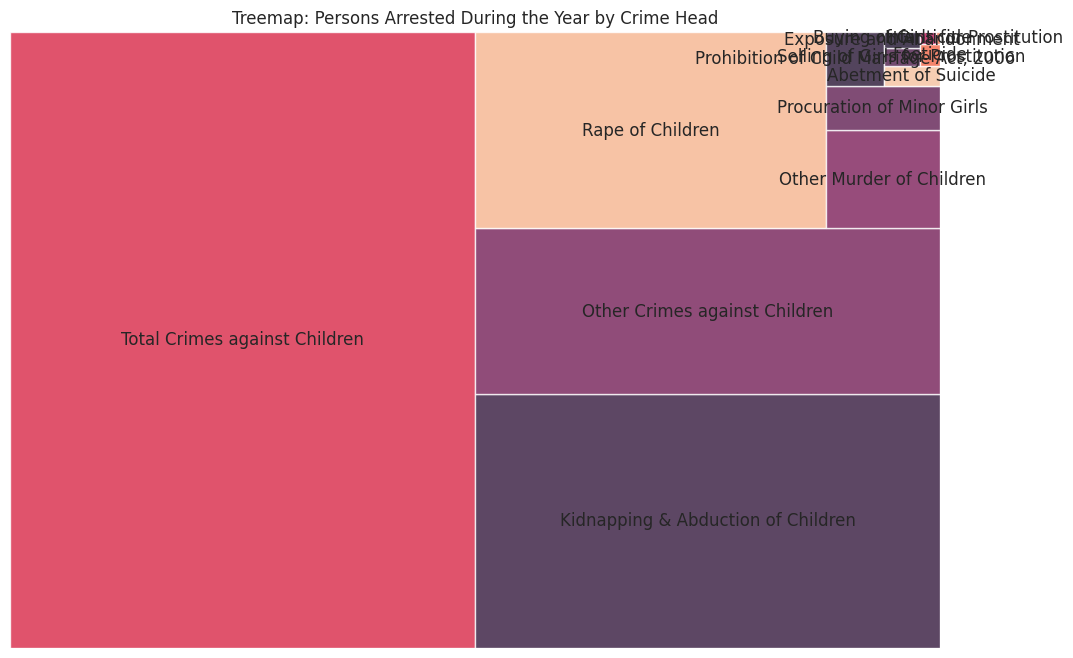

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Group the data by crime head and calculate the sum of persons arrested during the year
crime_head_data = processed_data.groupby('CRIME HEAD')['Persons arrested during the year'].sum().reset_index()

# Sort the data by persons arrested during the year in descending order
crime_head_data.sort_values(by='Persons arrested during the year', ascending=False, inplace=True)

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=crime_head_data['Persons arrested during the year'], label=crime_head_data['CRIME HEAD'], alpha=0.8)
plt.axis('off')
plt.title('Treemap: Persons Arrested During the Year by Crime Head')
plt.show()


<Figure size 1200x800 with 0 Axes>

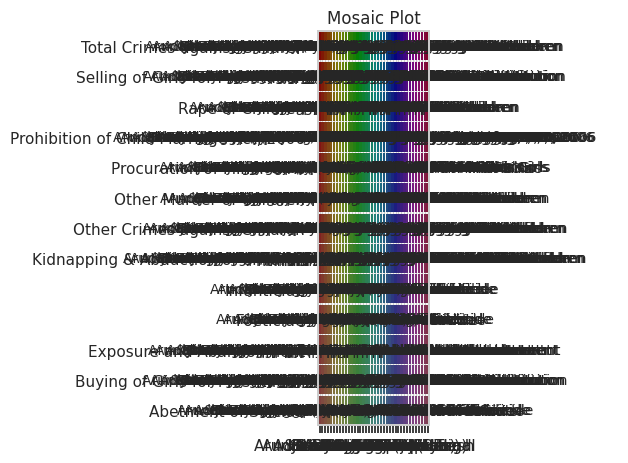

In [115]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

# Custom labelizer function with padding
def labelizer(k):
    label = k
    if isinstance(k, tuple):
        label = ' '.join(k)
    return label + ' ' * 5  # Add padding to the label

# Load the processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Plotting
plt.figure(figsize=(12, 8))  # Set the figure size to 12x8
mosaic(processed_data, ['STATE/UT', 'CRIME HEAD'], title='Mosaic Plot', labelizer=labelizer)
plt.xticks(rotation=90)  # Rotate x-axis labels by 0 degrees
plt.tight_layout()
plt.show()


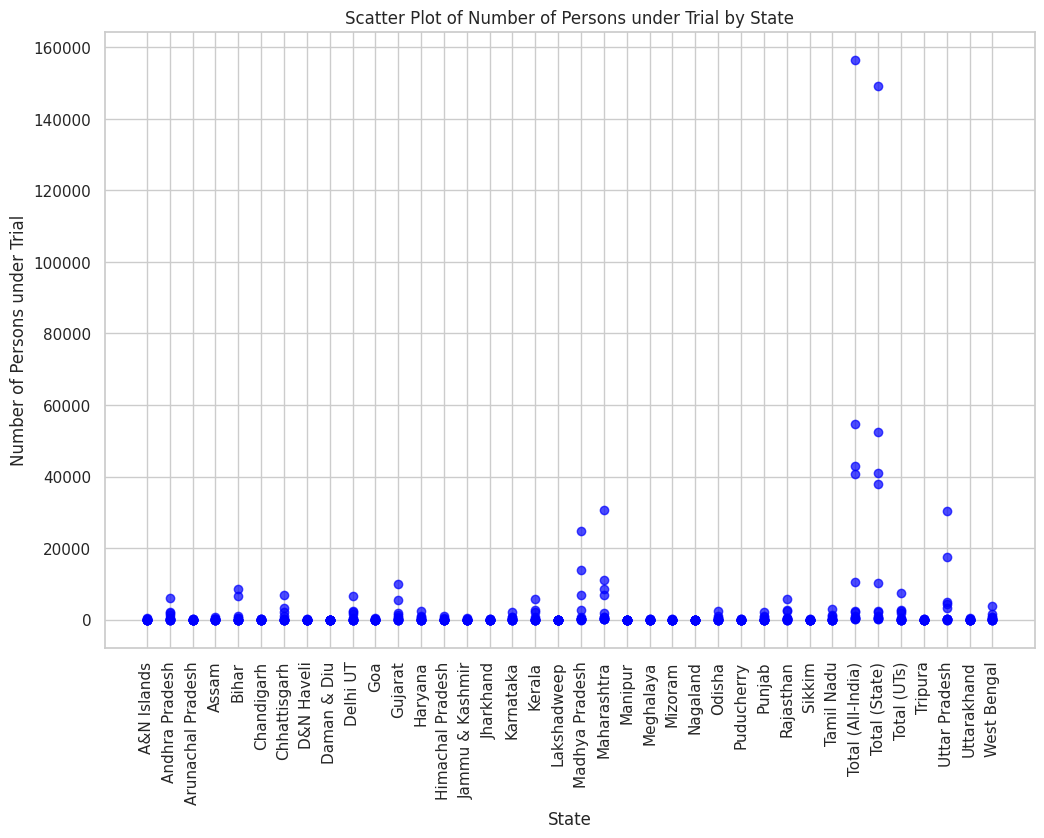

In [117]:
import matplotlib.pyplot as plt

# Assuming 'processed_data' is your DataFrame containing the necessary columns
# Extracting the columns for the scatter plot
x_data = processed_data['STATE/UT']  # Assuming 'STATE/UT' is the column for states
y_data = processed_data['Total number of persons under trial during the year']  # Assuming this is the column for number of persons under trial

# Plotting the scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.scatter(x_data, y_data, color='blue', alpha=0.7)  # Adjust color and transparency as needed
plt.title('Scatter Plot of Number of Persons under Trial by State')  # Set the title of the plot
plt.xlabel('State')  # Set the label for the X-axis
plt.ylabel('Number of Persons under Trial')  # Set the label for the Y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(True)  # Add grid lines if desired
plt.show()

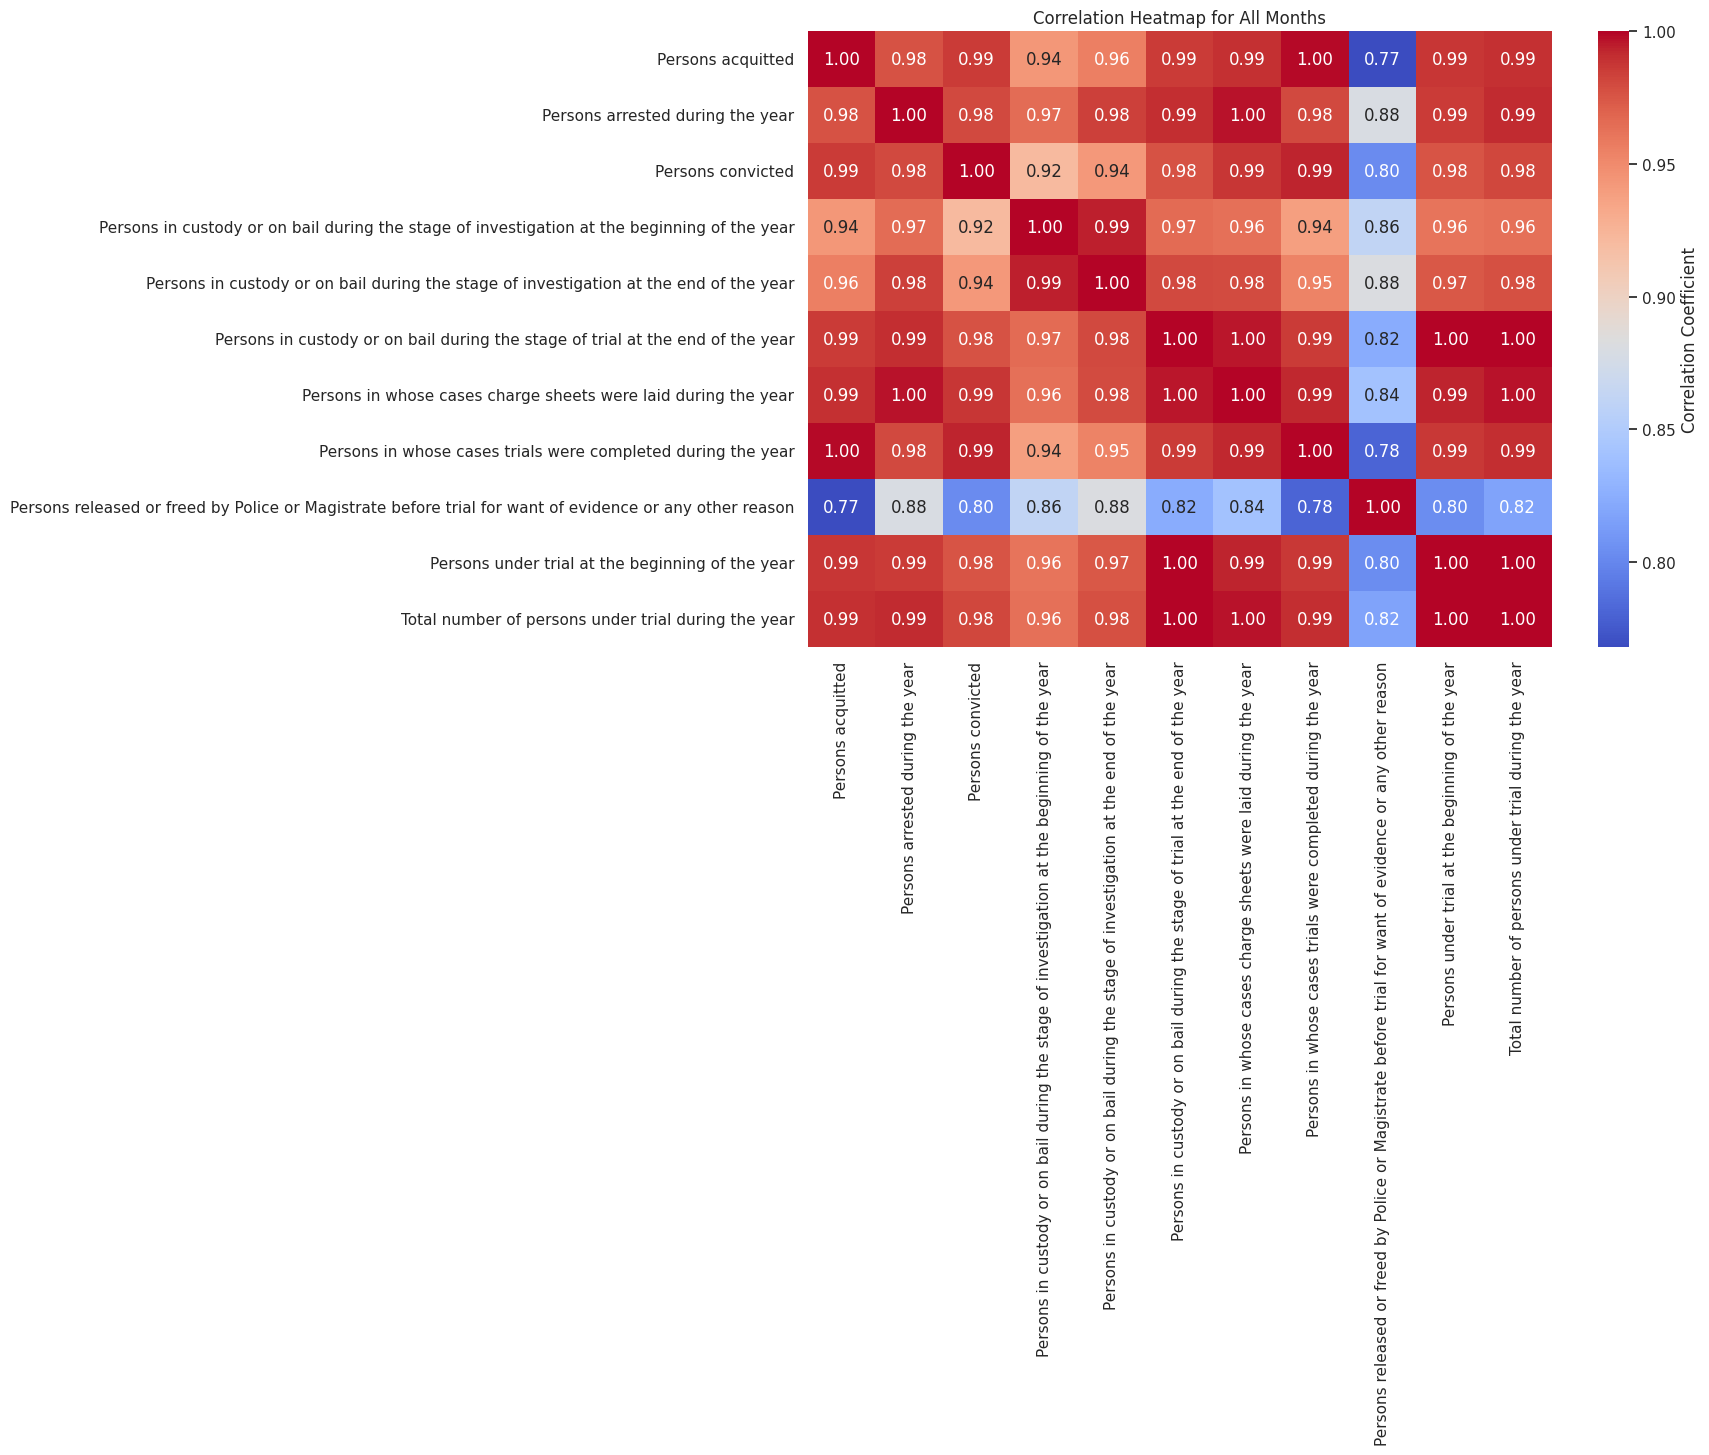

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed data from CSV
processed_data = pd.read_csv('processed_data.csv')

# Subset the data to include only the numeric columns
numeric_data = processed_data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap for All Months')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

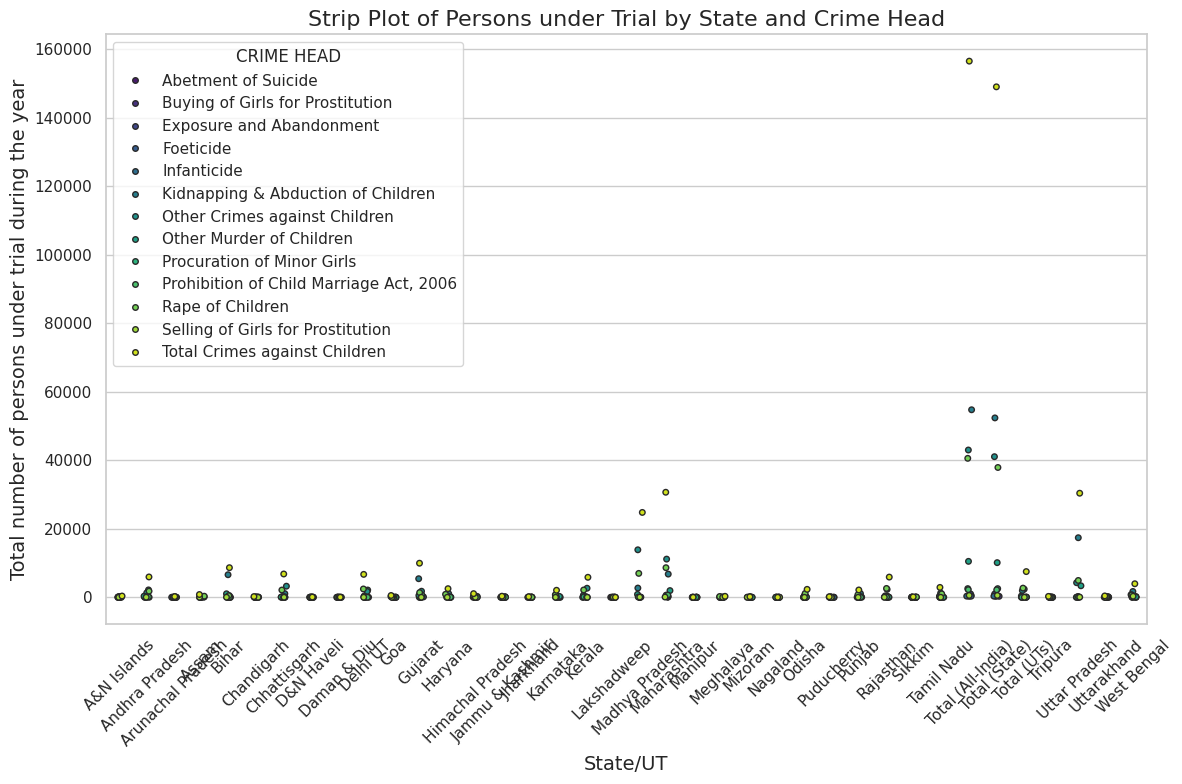

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'processed_data' is your DataFrame containing the necessary columns
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the strip plot
sns.stripplot(data=processed_data, x='STATE/UT', y='Total number of persons under trial during the year', hue='CRIME HEAD', jitter=True, linewidth=1, size=4, palette='viridis')

# Add title and labels
plt.title('Strip Plot of Persons under Trial by State and Crime Head', fontsize=16)
plt.xlabel('State/UT', fontsize=14)
plt.ylabel('Total number of persons under trial during the year', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

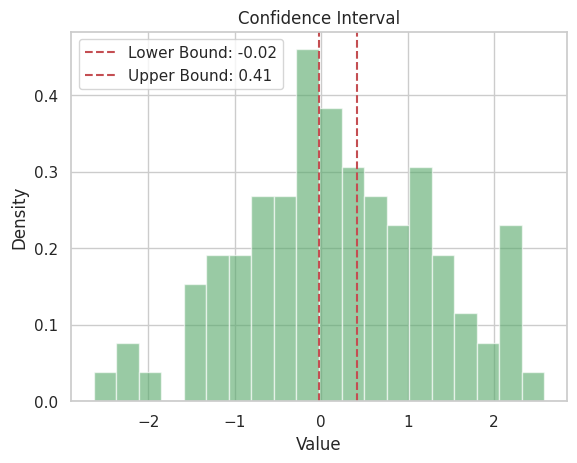

In [76]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data
data = np.random.normal(loc=0, scale=1, size=100)

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate the standard error of the mean (SEM)
sem = std_dev / np.sqrt(len(data))

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * sem

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Plotting
plt.hist(data, bins=20, density=True, alpha=0.6, color='g')

# Plot the confidence interval
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.legend()

plt.title('Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


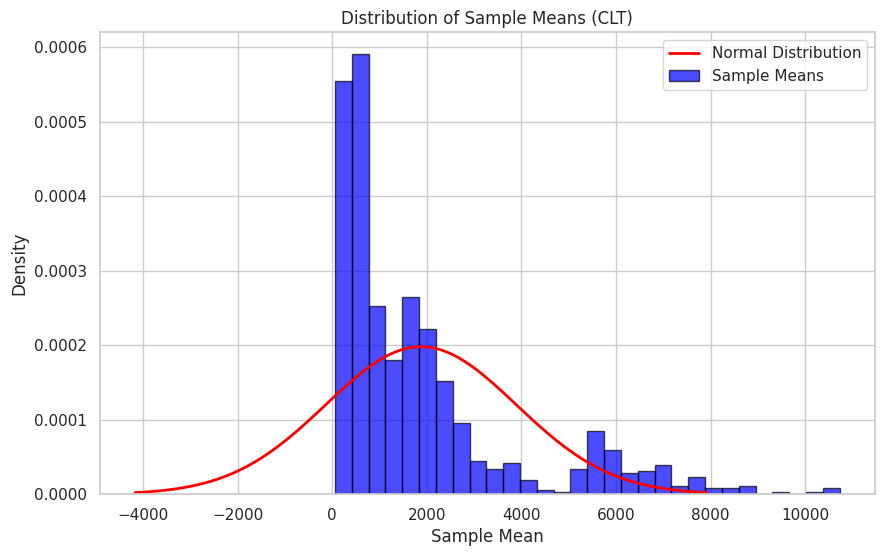

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('processed_data.csv')

# Select the column for analysis (replace 'column_to_analyze' with your column name)
column_to_analyze = 'Total number of persons under trial during the year'

# Define parameters
sample_size = 30  # Adjust the sample size as needed
num_samples = 1000  # Number of samples to take

# Initialize array to store sample means
sample_means = np.zeros(num_samples)

# Take multiple samples and calculate sample means
for i in range(num_samples):
    sample = np.random.choice(data[column_to_analyze], size=sample_size, replace=False)
    sample_means[i] = np.mean(sample)

# Plot histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Overlay theoretical normal distribution
mu = np.mean(sample_means)
sigma = np.std(sample_means)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (CLT)')
plt.legend(['Normal Distribution', 'Sample Means'])

# Show plot
plt.show()


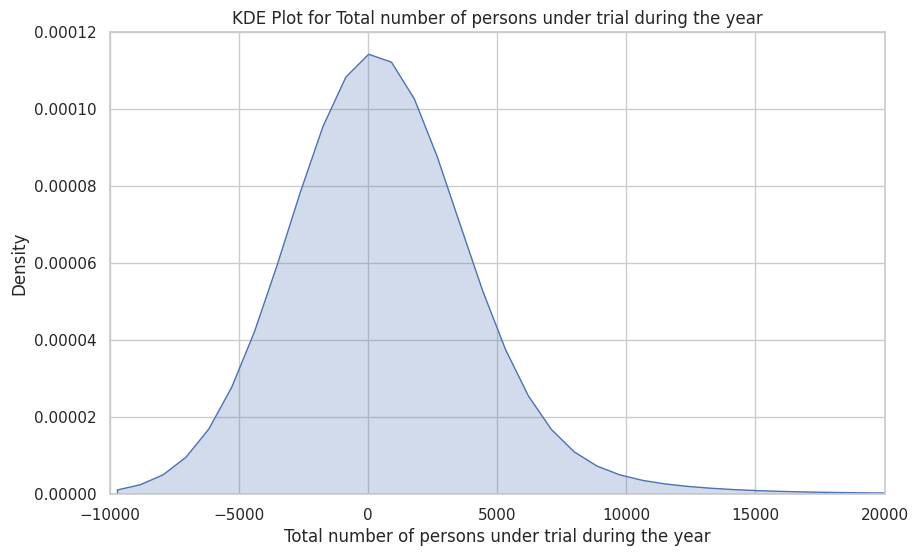

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('processed_data.csv')

# Select the column for analysis (replace 'column_to_analyze' with your column name)
column_to_analyze = 'Total number of persons under trial during the year'

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data[column_to_analyze], shade=True)
plt.title(f'KDE Plot for {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.xlim(-10000, 20000)  # Set x-axis limits
plt.grid(True)
plt.show()

In [111]:
import numpy as np
from scipy.stats import ttest_ind

# Generate random data for two crime heads
sample_size = 100  # Number of samples in each group
mean1 = 50  # Mean for group 1
std_dev1 = 10  # Standard deviation for group 1
mean2 = 55  # Mean for group 2
std_dev2 = 12  # Standard deviation for group 2

# Generate random samples
sample1 = np.random.normal(mean1, std_dev1, sample_size)
sample2 = np.random.normal(mean2, std_dev2, sample_size)

# Perform the t-test
t_stat, p_val = ttest_ind(sample1, sample2)

# Print the results
print("T-statistic:", t_stat)
print("p-value:", p_val)

T-statistic: -3.5223954706705753
p-value: 0.00053090824121753


In [128]:
import pandas as pd
from scipy.stats import f_oneway

# Load the data from CSV
data = pd.read_csv('processed_data.csv')

# Select the column for analysis
column_to_analyze = 'Total number of persons under trial during the year'

# Group data by 'STATE/UT' and calculate mean for each group
group_means = data.groupby('STATE/UT')[column_to_analyze].mean()

# Perform P-test
f_stat, p_val = f_oneway(*[group[column_to_analyze] for name, group in data.groupby('STATE/UT')])

# Print the p-value
print("p-value:", p_val)

# Interpret the results based on the p-value and significance level
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject null hypothesis: There is a significant difference in means among groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in means among groups.")

p-value: 2.9172800926258395e-10
Reject null hypothesis: There is a significant difference in means among groups.


In [130]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Load the data from CSV
data = pd.read_csv('processed_data.csv')

# Select the column for analysis
column_to_analyze = 'Total number of persons under trial during the year'

# Perform t-test for pairwise comparisons between states
states = data['STATE/UT'].unique()
t_values = {}
for i in range(len(states)):
    for j in range(i+1, len(states)):
        state1 = states[i]
        state2 = states[j]
        group1 = data[data['STATE/UT'] == state1][column_to_analyze]
        group2 = data[data['STATE/UT'] == state2][column_to_analyze]
        t_stat, p_val = ttest_ind(group1, group2)
        t_values[(state1, state2)] = {'t_statistic': t_stat, 'p_value': p_val}

# Print t-values
print("T-values for pairwise comparisons:")
for key, value in t_values.items():
    print(f"Comparison between {key[0]} and {key[1]}: t-statistic = {value['t_statistic']}, p-value = {value['p_value']}")

# Perform chi-square test for association between states and number of persons under trial during the year
cross_tab = pd.crosstab(data['STATE/UT'], data[column_to_analyze])
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)

# Print chi-square value and p-value
print("\nChi-square test for association:")
print(f"Chi-square statistic = {chi2_stat}")

T-values for pairwise comparisons:
Comparison between A&N Islands and Andhra Pradesh: t-statistic = -1.8301347612655183, p-value = 0.07967805564170323
Comparison between A&N Islands and Arunachal Pradesh: t-statistic = 0.707696926314775, p-value = 0.48594981196725384
Comparison between A&N Islands and Assam: t-statistic = -0.9628004974095724, p-value = 0.3452488778697891
Comparison between A&N Islands and Bihar: t-statistic = -1.6169597527155952, p-value = 0.1189568650535191
Comparison between A&N Islands and Chandigarh: t-statistic = 0.7367744442913515, p-value = 0.4684011812654365
Comparison between A&N Islands and Chhattisgarh: t-statistic = -1.778844788091293, p-value = 0.08793605020895118
Comparison between A&N Islands and D&N Haveli: t-statistic = 1.5560962887753627, p-value = 0.13277482638843927
Comparison between A&N Islands and Daman & Diu: t-statistic = 1.780680279537295, p-value = 0.0876283139985391
Comparison between A&N Islands and Delhi UT: t-statistic = -1.82025493634677